In [6]:
import tensorflow as tf
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [7]:
img_arr = cv2.imread("train/0/Training_3908.jpg")


In [8]:
img_arr.shape

(48, 48, 3)

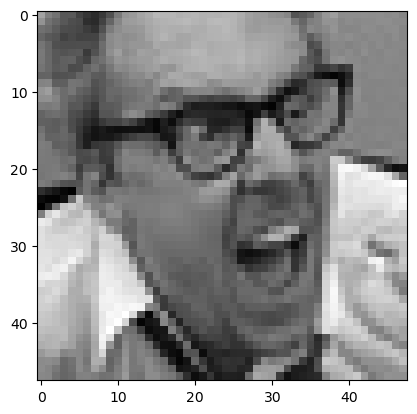

In [9]:
plt.imshow(img_arr)

In [10]:
Datadirectory = "train/"

In [11]:
classes = ["0" ,"1" ,"2" ,"3" , "4" , "5" , "6"] ##list

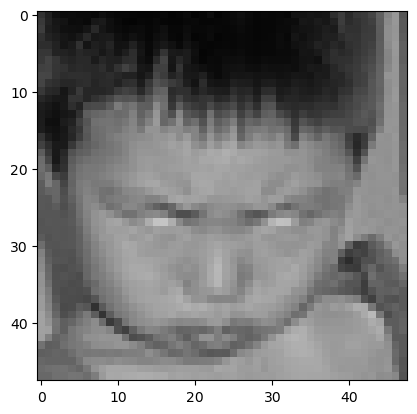

In [12]:
for category in classes:
    path = os.path.join(Datadirectory , category)
    for img in os.listdir(path):
        img_arr =cv2.imread(os.path.join(path,img))
        plt.imshow(cv2.cvtColor(img_arr ,cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break
        

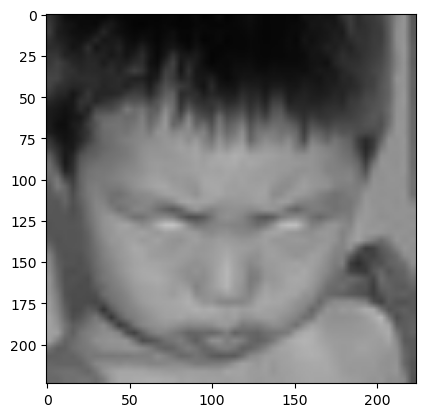

In [13]:
img_size =224
new_arr = cv2.resize(img_arr,(img_size , img_size))
plt.imshow(cv2.cvtColor(new_arr , cv2.COLOR_BGR2RGB))
plt.show()

In [14]:
new_arr.shape

(224, 224, 3)

In [15]:
training_Data =[]
def create_training_Data():
    for category in classes:
        path = os.path.join(Datadirectory , category)
        class_num = classes.index(category)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path,img))
                new_arr = cv2.resize(img_arr , (img_size , img_size))
                training_Data.append([new_arr,class_num])
            except Exception as e:
                pass   

In [16]:
create_training_Data()

In [17]:
print(len(training_Data))

7661


In [18]:
import random
random.shuffle(training_Data)

In [19]:
x = []
y = []
for features, label in training_Data:
    x.append(features)
    y.append(label)
x = np.array(x).reshape(-1 , img_size ,img_size ,3) 

In [20]:
x.shape

(7661, 224, 224, 3)

In [21]:
x = x.astype('float16')
x /= 255.0  # Normalize


In [22]:
type(y)

list

In [23]:
y[90]

6

In [24]:
y = np.array(y)

In [25]:
y.shape

(7661,)

deep learning training- transfering learning

In [26]:
import tensorflow as tf

from tensorflow import keras 
from tensorflow.keras import layers 

In [27]:
model = tf.keras.applications.MobileNetV2()

In [28]:
base_model = tf.keras.applications.MobileNetV2(input_shape=(224, 224, 3),
                                               include_top=False,  # Remove the original classification head
                                               weights='imagenet')  # Use pre-trained ImageNet weights

# Freeze the base model to prevent it from being trained initially
base_model.trainable = False

In [29]:
base_input = layers.Input(shape=(224, 224, 3))

In [30]:
base_input

<KerasTensor shape=(None, 224, 224, 3), dtype=float32, sparse=False, name=keras_tensor_310>

In [31]:
base_output = base_model(base_input)

In [32]:
base_output = layers.Flatten()(base_output)

In [33]:
base_output

<KerasTensor shape=(None, 62720), dtype=float32, sparse=False, name=keras_tensor_312>

In [34]:
final_output = layers.Dense(128)(base_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(64)(final_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(7,activation='softmax')(final_output)

In [35]:
final_output

<KerasTensor shape=(None, 7), dtype=float32, sparse=False, name=keras_tensor_317>

In [36]:
new_model = keras.Model(inputs = base_input, outputs = final_output)

In [37]:
new_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 62720)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       8,028,288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 7)                   │             455 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,294,983 (39.27 MB)

 Trainable params: 8,036,999 (30.66 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [38]:
new_model.compile(loss= "sparse_categorical_crossentropy",optimizer ="adam" , metrics =["accuracy"])

In [39]:
tf.keras.backend.clear_session()


In [40]:
import tensorflow as tf

# Configure the GPU to use a sufficient amount of memory
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    tf.config.set_logical_device_configuration(
        gpus[0],
        [tf.config.LogicalDeviceConfiguration(memory_limit=4096)])

In [41]:
x = x.astype('float32')

In [42]:
import cv2
x_resized = [cv2.resize(img, (128, 128)) for img in x]


In [43]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255)
train_generator = datagen.flow(x, y, batch_size=16)


In [44]:
new_model.fit(x, y, epochs=5, batch_size=16)


Epoch 1/5
479/479 ━━━━━━━━━━━━━━━━━━━━ 228s 449ms/step - accuracy: 0.3146 - loss: 4.1307
Epoch 2/5
479/479 ━━━━━━━━━━━━━━━━━━━━ 208s 434ms/step - accuracy: 0.6347 - loss: 1.0387
Epoch 3/5
479/479 ━━━━━━━━━━━━━━━━━━━━ 215s 449ms/step - accuracy: 0.7993 - loss: 0.5844
Epoch 4/5
479/479 ━━━━━━━━━━━━━━━━━━━━ 220s 459ms/step - accuracy: 0.8727 - loss: 0.3776
Epoch 5/5
479/479 ━━━━━━━━━━━━━━━━━━━━ 218s 455ms/step - accuracy: 0.9141 - loss: 0.2526


In [45]:
new_model.save('final_model_95p07.keras')

In [46]:
new_model = tf.keras.models.load_model('final_model_95p07.keras')

testing a random image from net

In [47]:
frame = cv2.imread("crying.jpg")

In [48]:
plt.clf()  # Clear the current figure


<Figure size 640x480 with 0 Axes>

In [49]:
frame.shape

(295, 441, 3)

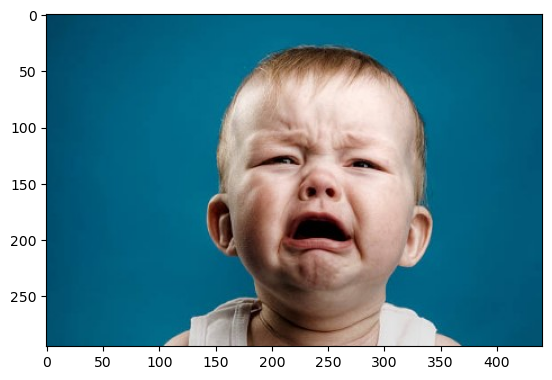

In [50]:
plt.imshow(cv2.cvtColor(frame , cv2.COLOR_BGR2RGB))

In [51]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')

In [52]:
gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)  #as haarcascade needs gray image

In [53]:
gray.shape

(295, 441)

In [54]:
faces = faceCascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in faces:
    roi_gray = gray[y:y+h , x: x+w ]
    roi_color = frame [y:y+h ,x:x+w ]
    cv2.rectangle(frame , (x,y) ,(x+w ,y +h) ,(0 ,225,0),2)           #for detecting multiple fcae
    facess = faceCascade.detectMultiScale(roi_gray)
    if len(facess)==0:
        print("face not detected")
    else :
        for (ex , ey ,ew ,eh) in facess :
            face_roi = roi_color[ey:ey+eh , ex: ex+ew]

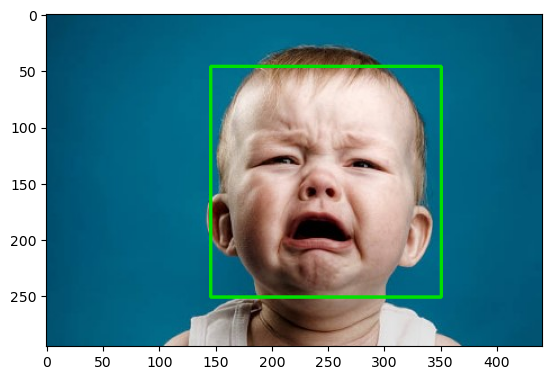

In [55]:
plt.imshow(cv2.cvtColor(frame ,cv2.COLOR_BGR2RGB))

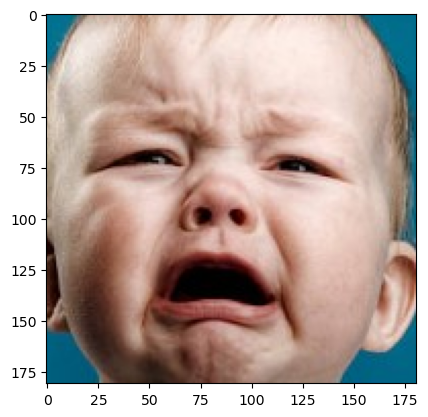

In [56]:
plt.imshow(cv2.cvtColor(face_roi , cv2.COLOR_BGR2RGB))

In [57]:
final_image = cv2. resize(face_roi ,(224,224))
final_image = np.expand_dims(final_image , axis =0)
final_image = final_image/225.0 

In [58]:
prediction = new_model.predict(final_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


In [59]:
prediction[0]

array([6.5576039e-02, 1.1345458e-02, 2.4464542e-02, 1.0247182e-04,
       1.9308981e-01, 4.6644598e-02, 6.5877718e-01], dtype=float32)

In [60]:
np.argmax(prediction)

6

live image read

In [99]:
import cv2 
path = "haarcascade_frontalface_default.xml"
font_scale = 1.5
font = cv2.FONT_HERSHEY_PLAIN


rectangle_bgr = (255, 255, 255)
# make a black image
img = np.zeros ((580, 508))
# set some text
text = "Some text in a box!"
# get the width and height of the text box
(text_width, text_height) = cv2.getTextSize(text, font, fontScale=font_scale, thickness=1)[0]
# set the text start position
text_offset_x = 10
text_offset_y = img.shape[0] - 25
# make the coords of the box with a smoll padding of two pixels
box_coords = ((text_offset_x, text_offset_y), (text_offset_x + text_width + 2, text_offset_y - text_height - 2))
cv2. rectangle(img, box_coords[0], box_coords[1], rectangle_bgr, cv2. FILLED)
cv2. putText(img, text, (text_offset_x, text_offset_y), font, fontScale=font_scale, color=(0, 0, 0), thickness=1)



import numpy as np

cap = cv2.VideoCapture(0) 
if not cap.isOpened():
    raise IOError("Cannot open webcam")

while True:
    ret, frame = cap.read()
    if not ret:
        print("Failed to grab frame")
        break

    # Your face detection and emotion recognition code would go here...

    cv2.imshow('Face Emotion Recognition', frame)

    # Check for key press and exit if 'q' is pressed
    key = cv2.waitKey(1)  # Wait for a short amount of time (1 ms)
    if key == ord('q'):    # If the key pressed is 'q'
        break  # Exit the loop

# Release the webcam and destroy aqll OpenCV windows
cap.release()
cv2.destroyAllWindows()


while True:
    ret, frame = cap.read()
    #eye_cascade = cv2. CascadeClassifier(cv2. data.haarcascades + 'haarcascade_eye.xmL")

    faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    gray = cv2.cvtColor (frame, cv2.COLOR_BGR2GRAY)
    #print(faceCascade.empty())
    faces = faceCascade.detectMultiScale(gray,1.1,4)
    for x,y,w,h in faces:
        roi_gray = gray[y:y+h , x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        
        cv2. rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
        facess = faceCascade.detectMultiScale(roi_gray)
        if len (facess) == 0:
            print("Face not detected")
        else:
            for (ex,ey,ew,eh) in facess:
                face_roi = roi_color[ey: ey+eh, ex:ex + ew] ## cropping the face

final_image =cv2.resize(face_roi, (224,224))
final_image =np.expand_dims (final_image,axis =0) ## need fourth dimension
final_image=final_image/255.0

font = cv2.FONT_HERSHEY_SIMPLEX

Predictions = new_model.predict(final_image)

font_scale = 1.5
font = cv2.FONT_HERSHEY_PLAIN

if (np.argnax(Predictions)==0):
    status = "Angry"
    x1,y1, w1,h1 = 0,0,175,75
    # Draw black background rectangle
    cv2. rectangle(frame, (x1, x1), (x1 + wl, yl + h1), (0,0,0), -1)
    # Add text
    cv2. putText(frame, status, (x1 + int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
    cv2. putText(frame, status, (180, 150), font, 3, (0, 0, 255), 2, cv2. LINE_4)
    cv2. rectangle(frame, (x, y), (x+w, y+h), (8, 8, 255))


elif (np.argmax(Predictions)==1):
    status = "Disgust"
    x1, yl,x1,h1 = 0,0,175,75
    # Draw black background rectangle
    cv2. rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0,0,0), -1)
    # Add text
    cv2. putText(frame, status, (x1 + int(w1/10),y1 + int(h1/2)), cv2. FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
    ev2. putText(frame, status, (180, 150), font, 3,(0, 0, 255),2, cv2. LINE_4)
    cv2. rectangle(frame, (x, y), (x+w, y+h), (8, 8, 255))


elif (np.argmax(Predictions)==2):
    status = "fear"
    x1, yl,x1,h1 = 0,0,175,75
    # Draw black background rectangle
    cv2. rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0,0,0), -1)
    # Add text
    cv2. putText(frame, status, (x1 + int(w1/10),y1 + int(h1/2)), cv2. FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
    cv2. putText(frame, status, (180, 150), font, 3,(0, 0, 255),2, cv2. LINE_4)
    cv2. rectangle(frame, (x, y), (x+w, y+h), (8, 8, 255))

elif (np.argmax(Predictions)==3):
    status = "happy"
    x1, yl,x1,h1 = 0,0,175,75
    # Draw black background rectangle
    cv2. rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0,0,0), -1)
    # Add text
    cv2. putText(frame, status, (x1 + int(w1/10),y1 + int(h1/2)), cv2. FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
    cv2. putText(frame, status, (180, 150), font, 3,(0, 0, 255),2, cv2. LINE_4)
    cv2. rectangle(frame, (x, y), (x+w, y+h), (8, 8, 255))

elif (np.argmax(Predictions)==4):
    status = "sad"
    x1, yl,x1,h1 = 0,0,175,75
    # Draw black background rectangle
    cv2. rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0,0,0), -1)
    # Add text
    cv2. putText(frame, status, (x1 + int(w1/10),y1 + int(h1/2)), cv2. FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
    cv2. putText(frame, status, (180, 150), font, 3,(0, 0, 255),2, cv2. LINE_4)
    cv2. rectangle(frame, (x, y), (x+w, y+h), (8, 8, 255))



elif (np.argmax(Predictions)==5):
    status = "surprise"
    x1, yl,x1,h1 = 0,0,175,75
    # Draw black background rectangle
    cv2. rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0,0,0), -1)
    # Add text
    cv2. putText(frame, status, (x1 + int(w1/10),y1 + int(h1/2)), cv2. FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
    cv2. putText(frame, status, (180, 150), font, 3,(0, 0, 255),2, cv2. LINE_4)
    cv2. rectangle(frame, (x, y), (x+w, y+h), (8, 8, 255))


else:
    status = "NEUTRAL "
    x1, yl,x1,h1 = 0,0,175,75
    # Draw black background rectangle
    cv2. rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0,0,0), -1)
    # Add text
    cv2. putText(frame, status, (x1 + int(w1/10),y1 + int(h1/2)), cv2. FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
    cv2. putText(frame, status, (180, 150), font, 3,(0, 0, 255),2, cv2. LINE_4)
    cv2. rectangle(frame, (x, y), (x+w, y+h), (8, 8, 255))

    cv2. imshow( 'Face Emotion Recognition', frame)
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
        
cap. release()
cv2.destroyAllWindows()


import cv2
import numpy as np

cap = cv2.VideoCapture(0)  # Open the webcam (0 for default camera)
if not cap.isOpened():
    raise IOError("Cannot open webcam")

while True:
    ret, frame = cap.read()
    if not ret:
        print("Failed to grab frame")
        break

    # Your face detection and emotion recognition code would go here...

    cv2.imshow('Face Emotion Recognition', frame)

    # Check for key press and exit if 'q' is pressed
    key = cv2.waitKey(1)  # Wait for a short amount of time (1 ms)
    if key == ord('q'):    # If the key pressed is 'q'
        break  # Exit the loop

# Release the webcam and destroy all OpenCV windows
cap.release()
cv2.destroyAllWindows()


error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [98]:
cap.release()
cv2.destroyAllWindows()


corrected code for live vide need to see errorr in prev code 

In [100]:
import cv2
import numpy as np

# Path to Haar Cascade for face detection 
path = "haarcascade_frontalface_default.xml"

# Video capture from webcam
cap = cv2.VideoCapture(1)  # Tries to open an external camera first
if not cap.isOpened():
    cap = cv2.VideoCapture(0)  # Tries to open the default camera
if not cap.isOpened():
    raise IOError("Cannot open webcam")

faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

while True:
    ret, frame = cap.read()  # Capture frame from webcam
    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
    faces = faceCascade.detectMultiScale(gray, 1.1, 4)  # Detect faces

    for (x, y, w, h) in faces:
        roi_gray = gray[y:y+h, x:x+w]  # Region of interest (face) in grayscale
        roi_color = frame[y:y+h, x:x+w]  # Region of interest (face) in color
        
        # Draw rectangle around the face
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

        # Prepare the face for emotion prediction (resize and normalize)
        face_roi = cv2.resize(roi_color, (224, 224))  # Resize the face
        face_roi = np.expand_dims(face_roi, axis=0)  # Add batch dimension
        face_roi = face_roi / 255.0  # Normalize pixel values
        
        # Predictions (assuming your model is loaded as 'new_model')
        # Predictions = new_model.predict(face_roi)
        
        # Dummy emotion for testing (replace this with actual predictions)
        emotion = np.random.randint(0, 7)  # Randomly pick an emotion index for demo
        
        # Map prediction to emotion label
        if emotion == 0:
            status = "Angry"
        elif emotion == 1:
            status = "Disgust"
        elif emotion == 2:
            status = "Fear"
        elif emotion == 3:
            status = "Happy"
        elif emotion == 4:
            status = "Sad"
        elif emotion == 5:
            status = "Surprise"
        else:
            status = "Neutral"

        # Add a semi-transparent black box for text background
        overlay = frame.copy()
        cv2.rectangle(overlay, (x, y - 50), (x + w, y), (0, 0, 0), -1)
        alpha = 0.6  # Transparency factor
        frame = cv2.addWeighted(overlay, alpha, frame, 1 - alpha, 0)

        # Text settings
        font = cv2.FONT_HERSHEY_SIMPLEX
        font_scale = 1.2
        color = (255, 255, 255)  # White color for text
        thickness = 2

        # Calculate the size of the text box
        text_size = cv2.getTextSize(status, font, font_scale, thickness)[0]
        text_x = x + (w - text_size[0]) // 2  # Center the text horizontally
        text_y = y - 15  # Position it above the face rectangle

        # Put the text inside the semi-transparent box
        cv2.putText(frame, status, (text_x, text_y), font, font_scale, color, thickness)

    # Show the frame with the detection and prediction
    cv2.imshow('Face Emotion Recognition', frame)

    # Break the loop if 'q' is pressed
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

# Release the webcam and destroy windows
cap.release()
cv2.destroyAllWindows()
